In [1]:
import pandas as pd
crimes = pd.read_csv('http://cluster.earlham.edu/~apc0013/Chicago_crime.csv')

In [2]:
crimes.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,2746413,HJ384532,05/20/2003 08:00:00 PM,072XX S FAIRFIELD AVE,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,False,False,...,18.0,66.0,05,1159293.0,1856544.0,2003,02/28/2018 03:56:25 PM,41.762076,-87.691736,"(41.762075613, -87.691735556)"
1,2746414,HJ385055,05/24/2003 09:25:00 PM,015XX W ROOSEVELT RD,0420,BATTERY,AGGRAVATED:KNIFE/CUTTING INSTR,SIDEWALK,False,False,...,2.0,28.0,04B,1166352.0,1894784.0,2003,02/28/2018 03:56:25 PM,41.866863,-87.664773,"(41.866863003, -87.664772948)"
2,2746415,HJ384304,05/24/2003 01:10:00 PM,062XX S CLAREMONT AVE,031A,ROBBERY,ARMED: HANDGUN,STREET,False,False,...,15.0,66.0,03,1161795.0,1863307.0,2003,02/28/2018 03:56:25 PM,41.780583,-87.682378,"(41.78058266, -87.682377751)"
3,2746416,HJ384255,05/24/2003 02:00:00 PM,031XX N CLARK ST,0860,THEFT,RETAIL THEFT,SMALL RETAIL STORE,True,False,...,44.0,6.0,06,1170274.0,1920971.0,2003,02/28/2018 03:56:25 PM,41.938637,-87.649609,"(41.938636968, -87.64960867)"
4,2746418,HJ385442,05/25/2003 02:22:00 AM,031XX N BROADWAY,0810,THEFT,OVER $500,STREET,False,False,...,44.0,6.0,06,1171708.0,1920869.0,2003,02/28/2018 03:56:25 PM,41.938326,-87.644341,"(41.938325571, -87.644341433)"


In [3]:
crimes.dtypes

ID                        int64
Case Number              object
Date                     object
Block                    object
IUCR                     object
Primary Type             object
Description              object
Location Description     object
Arrest                     bool
Domestic                   bool
Beat                      int64
District                float64
Ward                    float64
Community Area          float64
FBI Code                 object
X Coordinate            float64
Y Coordinate            float64
Year                      int64
Updated On               object
Latitude                float64
Longitude               float64
Location                 object
dtype: object

In [4]:
crimes.shape

(6836023, 22)

 ### Graphs 
 
 #### Graph 1 : %crimes by location description (10 most common locations) 
 #### Graph 2 : %crimes by crime type (10 most common crime types) 
 #### Graph 3 : %crimes by Description 
 #### Graph 4 : Most common Locations based on type of crime for top ten highest occuring crimes
 #### Graph 6: Top ten places that an arrest is likely to occur in Chicago

Text(0, 0.5, 'Percentage of Crimes')

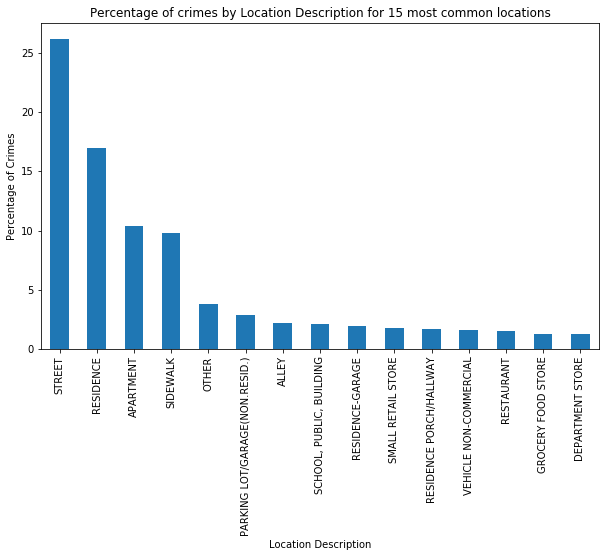

In [6]:
# Graph 1 : %crimes by location description (10 most common locations) 

import matplotlib.pyplot as plt
%matplotlib inline
percent = crimes['Location Description'].value_counts(normalize=True).apply(lambda x: 100*x)[:15]
fig = plt.figure(figsize=(10,6)) 
ax = fig.gca()     
percent.plot.bar(ax = ax) 
ax.set_title('Percentage of crimes by Location Description for 15 most common locations') 
ax.set_xlabel('Location Description')
ax.set_ylabel('Percentage of Crimes')


Text(0, 0.5, 'Percentage of Crimes')

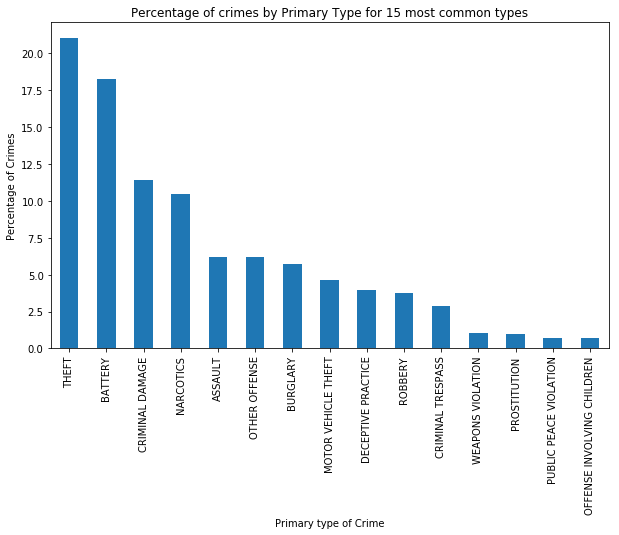

In [7]:
# Graph 2 : %crimes by crime type (10 most common crime types) 
percent = crimes['Primary Type'].value_counts(normalize=True).apply(lambda x: 100*x)[:15]
fig = plt.figure(figsize=(10,6)) 
ax = fig.gca()     
percent.plot.bar(ax = ax) 
ax.set_title('Percentage of crimes by Primary Type for 15 most common types') 
ax.set_xlabel('Primary type of Crime')
ax.set_ylabel('Percentage of Crimes')

Text(0, 0.5, 'Percentage of Crimes')

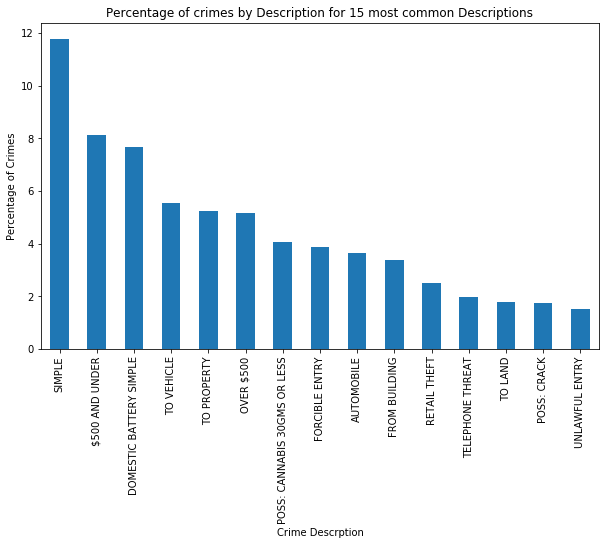

In [8]:
# Graph 3 : %crimes by Description 

percent = crimes['Description'].value_counts(normalize=True).apply(lambda x: 100*x)[:15]
fig = plt.figure(figsize=(10,6)) 
ax = fig.gca()     
percent.plot.bar(ax = ax) 
ax.set_title('Percentage of crimes by Description for 15 most common Descriptions') 
ax.set_xlabel('Crime Descrption')
ax.set_ylabel('Percentage of Crimes')

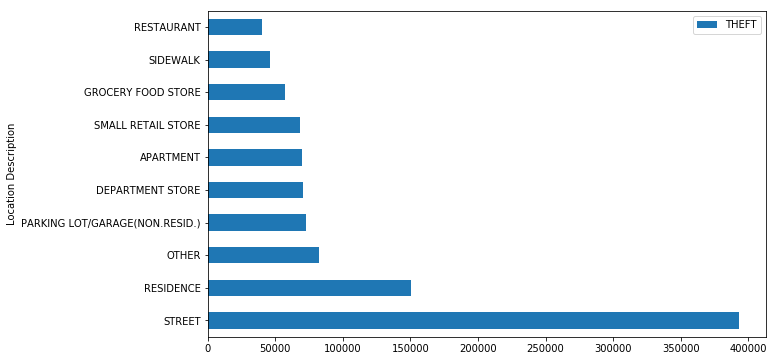

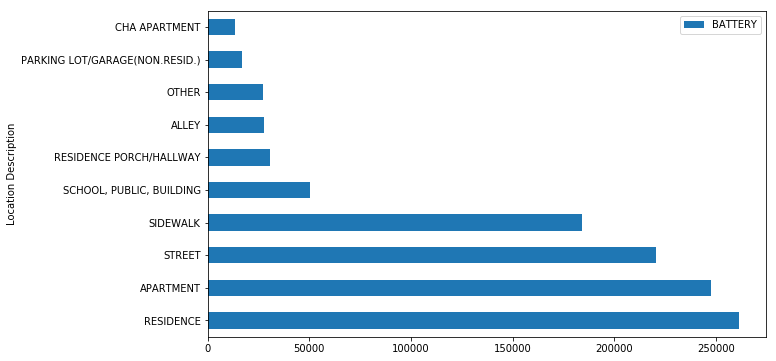

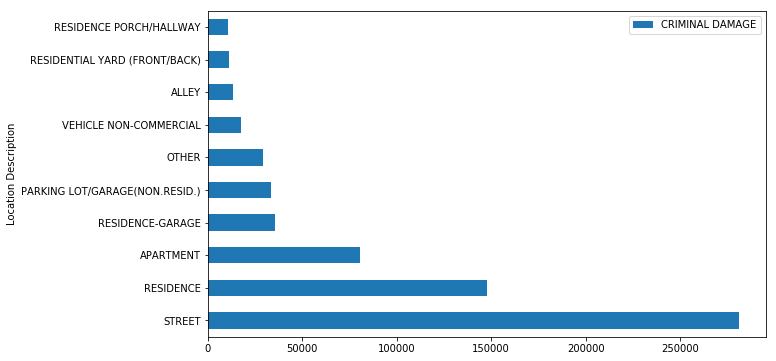

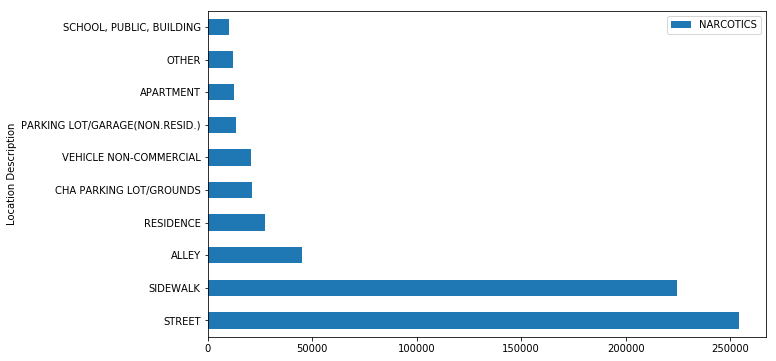

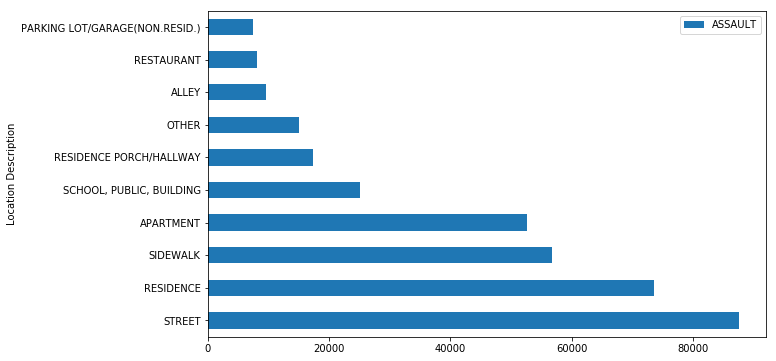

In [82]:
# Graph 4 : Most common Locations based on type of crime for top ten highest occuring crimes
import numpy as np
import seaborn as sns
location_by_type  = crimes.pivot_table(values='ID', index='Location Description', columns='Primary Type', aggfunc=np.size).fillna(0)
columns =  location_by_type.sum().sort_values(ascending=False).keys()[:5]

def plot_pivot_location_by_type(pivot_table,row):
    fig = plt.figure(figsize=(10,6)) 
    ax = fig.gca()
    pivot_table[row].sort_values(ascending= False)[:10].plot(kind='barh').legend()
   

for col in columns:
    plot_pivot_location_by_type(location_by_type,col)


    

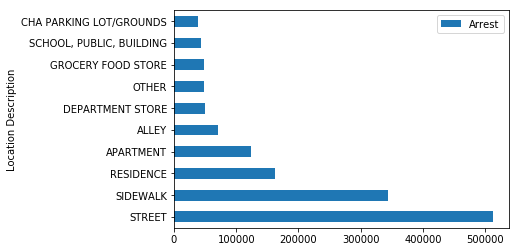

In [10]:
#Graph 6: Top ten places that an arrest is likely to occur in Chicago
foo = crimes[['Location Description','Arrest']].groupby('Location Description').sum(axis=1).sort_values(by = 'Arrest',ascending = False)[:10]
foo.plot(kind='barh')


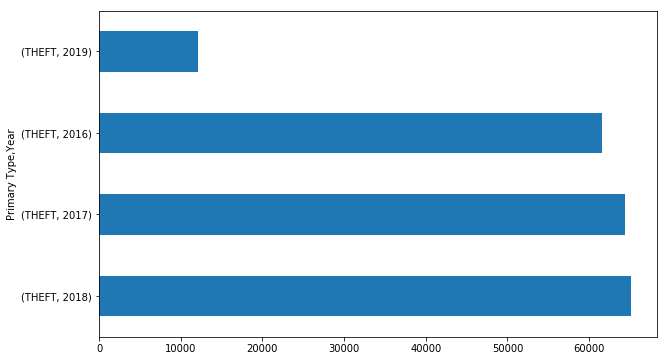

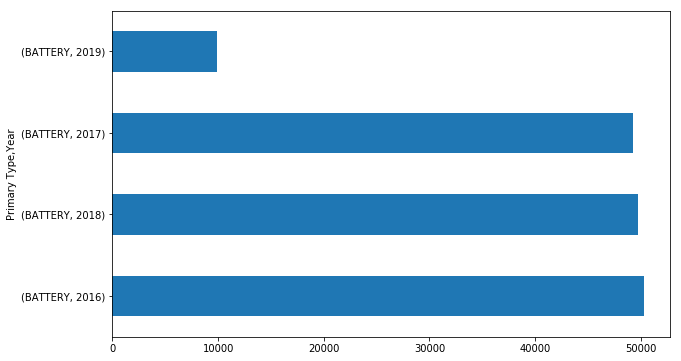

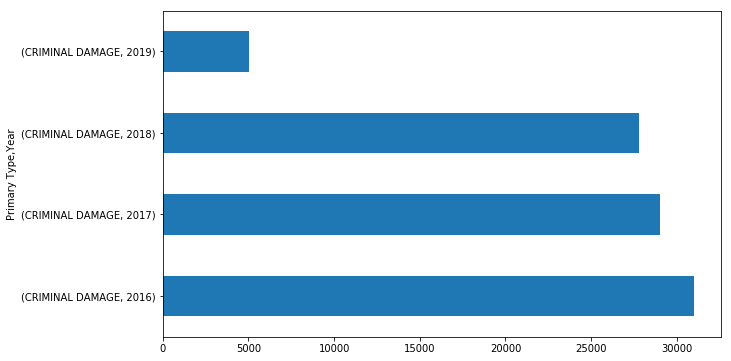

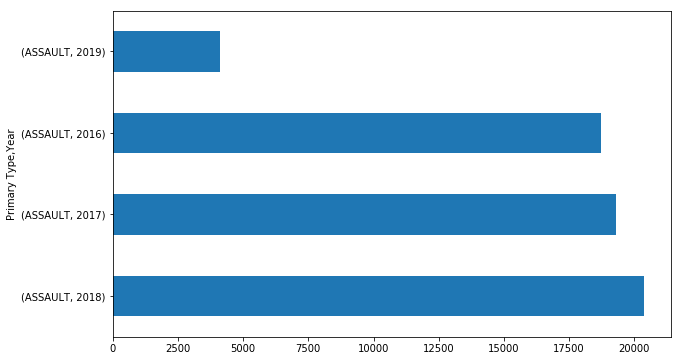

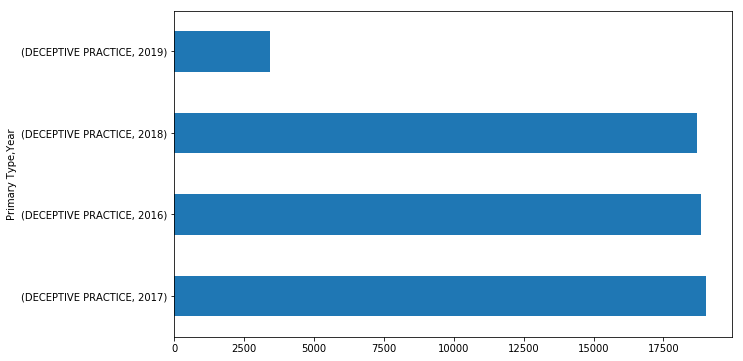

In [118]:
# crimes[['Year','Primary Type']].groupby('Primary Type').count()
year = crimes['Year']
arrests_by_year_type = crimes[crimes['Year']>2015]
arrests_by_year_type = arrests_by_year_type.pivot_table('Arrest',index = 'Year',columns = 'Primary Type',aggfunc=np.size)
columns =  arrests_by_year_type.sum().sort_values(ascending=False).keys()[:5]

def plot_pivot_location_by_type(pivot_table,row):
    fig = plt.figure(figsize=(10,6)) 
    ax = fig.gca()
    pivot_table[[row]].sort_values(ascending= False)[:10].plot(kind='barh')

for col in columns:
    plot_pivot_location_by_type(arrests_by_year_type.unstack(),col)


# arrests_by_year_type.unstack()[['ARSON']]



In [44]:
crimes['Primary Type'].value_counts()

THEFT                                1439300
BATTERY                              1248292
CRIMINAL DAMAGE                       780015
NARCOTICS                             716044
ASSAULT                               425168
OTHER OFFENSE                         424663
BURGLARY                              391519
MOTOR VEHICLE THEFT                   317528
DECEPTIVE PRACTICE                    269615
ROBBERY                               258515
CRIMINAL TRESPASS                     195678
WEAPONS VIOLATION                      72568
PROSTITUTION                           68549
PUBLIC PEACE VIOLATION                 48274
OFFENSE INVOLVING CHILDREN             46227
CRIM SEXUAL ASSAULT                    27802
SEX OFFENSE                            25563
INTERFERENCE WITH PUBLIC OFFICER       15584
GAMBLING                               14437
LIQUOR LAW VIOLATION                   14125
ARSON                                  11275
HOMICIDE                                9579
KIDNAPPING